In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Data Loading and Preprocessing

In [89]:
df = pd.read_csv(r"C:\Users\a_sur\Documents\Labmentix_Project_4_EMIPredict\dataset\emi_prediction_dataset.csv")
df.head()

C:\Users\a_sur\AppData\Local\Temp\ipykernel_576\3735035566.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\a_sur\Documents\Labmentix_Project_4_EMIPredict\dataset\emi_prediction_dataset.csv")


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


In [90]:
df.shape

(404800, 27)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

In [92]:
df.isna().sum()

age                          0
gender                       0
marital_status               0
education                 2404
monthly_salary               0
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent              2426
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score              2420
bank_balance              2426
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64

In [93]:
# Remove duplicates and trim whitespace
before = df.shape[0]
df = df.drop_duplicates().reset_index(drop=True)
after = df.shape[0]
print(f"Removed {before - after} duplicate rows\n")

# Strip whitespace in categorical text columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip()

Removed 0 duplicate rows



In [94]:
# Handling missing values 
# Numeric columns → fill with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns → fill with mode
cat_cols = df.select_dtypes(exclude=np.number).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [95]:
df.isna().sum()

age                       0
gender                    0
marital_status            0
education                 0
monthly_salary            0
employment_type           0
years_of_employment       0
company_type              0
house_type                0
monthly_rent              0
family_size               0
dependents                0
school_fees               0
college_fees              0
travel_expenses           0
groceries_utilities       0
other_monthly_expenses    0
existing_loans            0
current_emi_amount        0
credit_score              0
bank_balance              0
emergency_fund            0
emi_scenario              0
requested_amount          0
requested_tenure          0
emi_eligibility           0
max_monthly_emi           0
dtype: int64

In [96]:
print("Numeric features:", len(num_cols))
print("Categorical features:", len(cat_cols))
print("Unique values per categorical feature:\n")
for c in cat_cols:
    print(f"{c} — {df[c].nunique()} unique")

Numeric features: 15
Categorical features: 12
Unique values per categorical feature:

age — 33 unique
gender — 8 unique
marital_status — 2 unique
education — 5 unique
monthly_salary — 13662 unique
employment_type — 3 unique
company_type — 5 unique
house_type — 3 unique
existing_loans — 2 unique
bank_balance — 12262 unique
emi_scenario — 5 unique
emi_eligibility — 3 unique


In [97]:
for col in ["bank_balance", "monthly_salary"]:
    if col in df.columns:
        df[col] = (
            df[col]
            .str.replace(".0", "")
            .str.replace(" ", "")
            .astype(float)
        )

In [98]:
# Detect impossible or negative financials
financial_cols = [
    'monthly_salary', 'monthly_rent', 'travel_expenses', 'groceries_utilities',
    'other_monthly_expenses', 'current_emi_amount', 'bank_balance',
    'requested_amount', 'max_monthly_emi'
]
for col in financial_cols:
    if col in df.columns:
        invalid = (df[col] < 0).sum()
        if invalid > 0:
            print(f"Found {invalid} negative values in {col}, replacing with abs()")
            df[col] = df[col].abs()

In [99]:
df["emi_eligibility"].unique()

array(['Not_Eligible', 'Eligible', 'High_Risk'], dtype=object)

In [100]:
# Label encoding for binary/categorical columns
binary_map = {"Yes": 1, "No": 0,}

df = df.replace(binary_map)

cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
for col in cat_cols:
    df[col] = df[col].astype(str)

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("All categorical variables encoded safely")

C:\Users\a_sur\AppData\Local\Temp\ipykernel_576\903277026.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(binary_map)


All categorical variables encoded safely


In [101]:
# Train test split
target_class = "emi_eligibility"
target_reg = "max_monthly_emi"

feature_cols = [c for c in df.columns if c not in [target_class, target_reg]]

train_df, temp_df = train_test_split(
    df, test_size=0.3, random_state=42, stratify=df[target_class]
)
val_df, test_df = train_test_split(
    temp_df, test_size=0.5, random_state=42, stratify=temp_df[target_class]
)

print(f"Split complete:\nTrain: {train_df.shape}\nValidation: {val_df.shape}\nTest: {test_df.shape}")

train_df.to_csv(r"C:\Users\a_sur\Documents\Labmentix_Project_4_EMIPredict\dataset\train_processed.csv", index=False)
val_df.to_csv(r"C:\Users\a_sur\Documents\Labmentix_Project_4_EMIPredict\dataset\val_processed.csv", index=False)
test_df.to_csv(r"C:\Users\a_sur\Documents\Labmentix_Project_4_EMIPredict\dataset\test_processed.csv", index=False)
print("\nProcessed files saved successfully to dataset/folder.")

Split complete:
Train: (283360, 27)
Validation: (60720, 27)
Test: (60720, 27)

Processed files saved successfully to dataset/folder.


### EDA

C:\Users\a_sur\AppData\Local\Temp\ipykernel_576\3972529952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="emi_eligibility", data=df, palette="viridis")


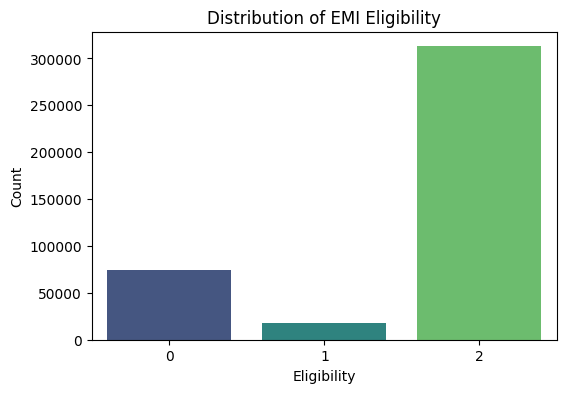

In [104]:
# EMI Eligibility distribution
plt.figure(figsize=(6,4))
sns.countplot(x="emi_eligibility", data=df, palette="viridis")
plt.title("Distribution of EMI Eligibility")
plt.xlabel("Eligibility")
plt.ylabel("Count")
plt.show()

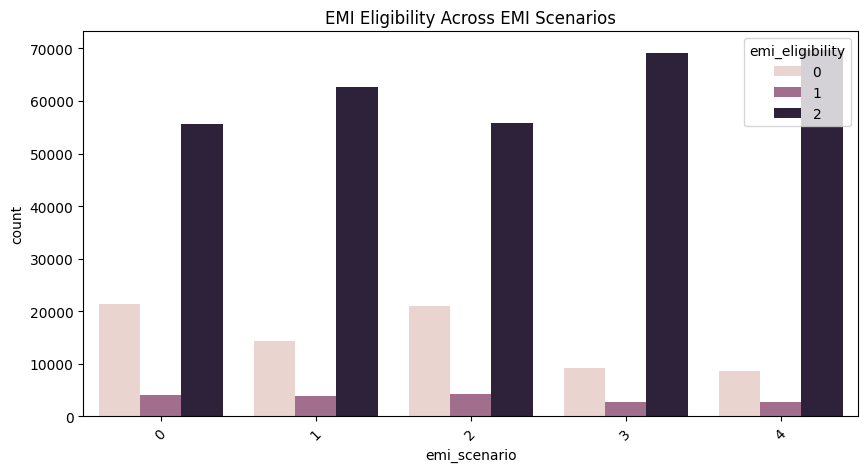

In [103]:
# EMI eligibility across EMI scenarios
if "emi_scenario" in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x="emi_scenario", hue="emi_eligibility", data=df)
    plt.title("EMI Eligibility Across EMI Scenarios")
    plt.xticks(rotation=45)
    plt.show()

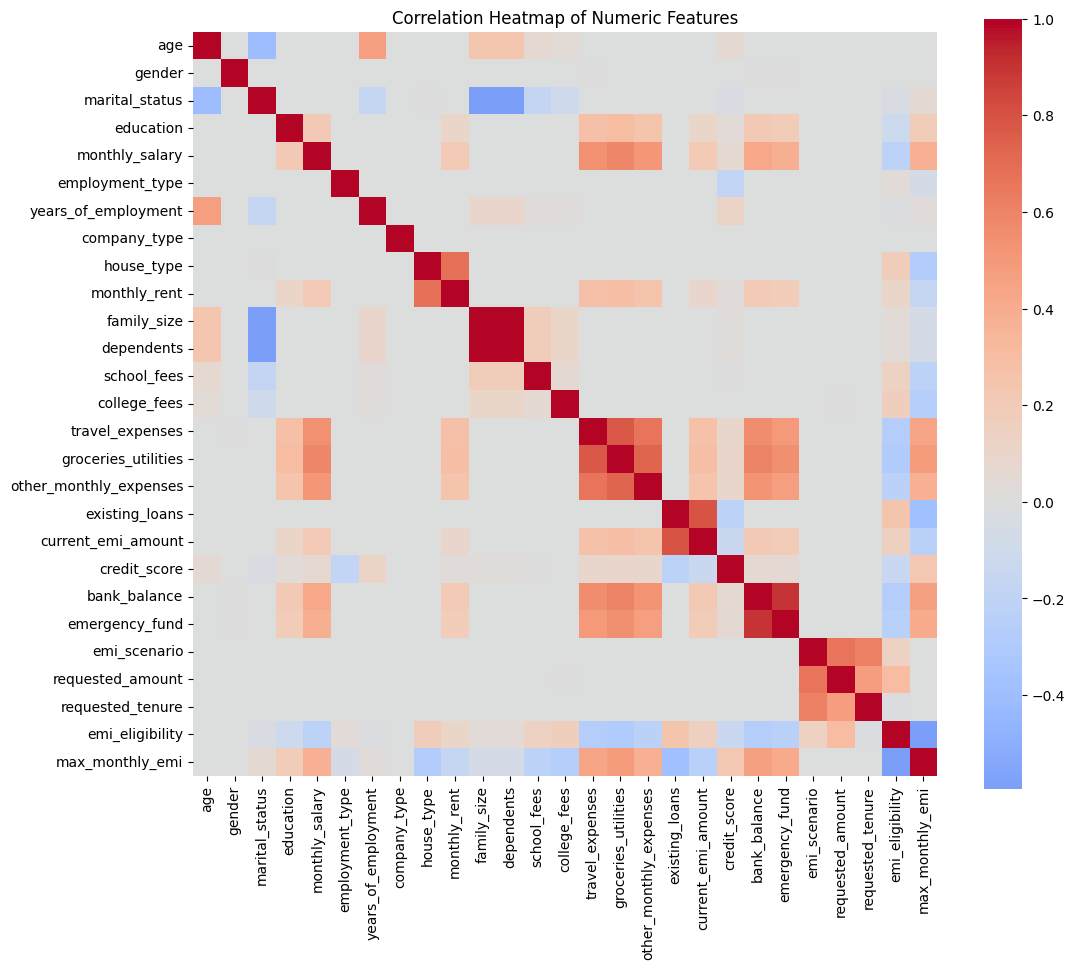

Top features correlated with max_monthly_emi:
max_monthly_emi           1.000000
groceries_utilities       0.484695
bank_balance              0.458561
travel_expenses           0.440948
emergency_fund            0.414036
other_monthly_expenses    0.382055
monthly_salary            0.379289
credit_score              0.228814
education                 0.191770
marital_status            0.055107
Name: max_monthly_emi, dtype: float64


In [106]:
# Correlation between key numeric financial variables
num_cols = df.select_dtypes(include=np.number).columns
corr = df[num_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0, square=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Identify top correlated features with max_monthly_emi
target_reg = "max_monthly_emi"
if target_reg in corr.columns:
    top_corr = corr[target_reg].sort_values(ascending=False).head(10)
    print("Top features correlated with max_monthly_emi:")
    print(top_corr)

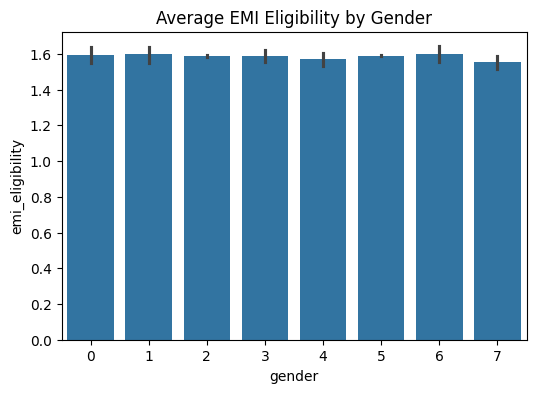

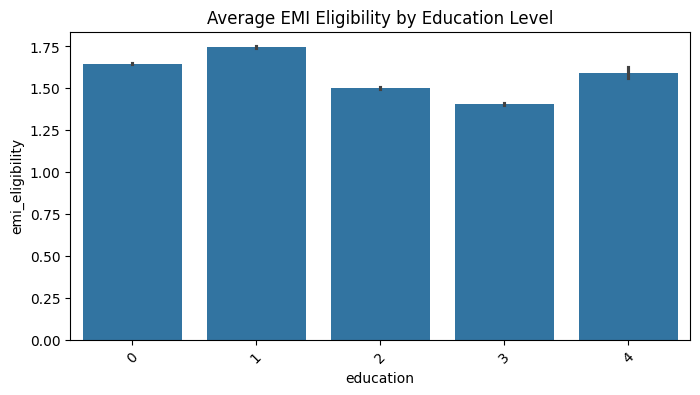

In [107]:
# Demographic insights
if "gender" in df.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(x="gender", y="emi_eligibility", data=df, estimator=np.mean)
    plt.title("Average EMI Eligibility by Gender")
    plt.show()

if "education" in df.columns:
    plt.figure(figsize=(8,4))
    sns.barplot(x="education", y="emi_eligibility", data=df, estimator=np.mean)
    plt.title("Average EMI Eligibility by Education Level")
    plt.xticks(rotation=45)
    plt.show()

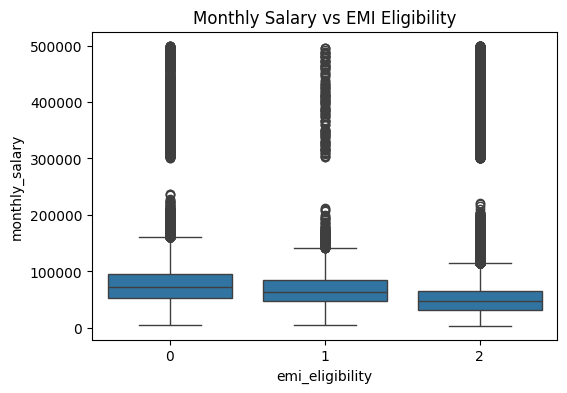

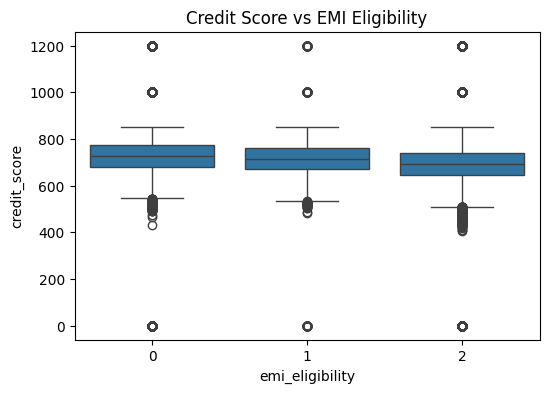

In [108]:
# Financial behavior and risk patterns
plt.figure(figsize=(6,4))
sns.boxplot(x="emi_eligibility", y="monthly_salary", data=df)
plt.title("Monthly Salary vs EMI Eligibility")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="emi_eligibility", y="credit_score", data=df)
plt.title("Credit Score vs EMI Eligibility")
plt.show()

In [110]:
# Statistical summary
print("Summary statistics:")
display(df.describe().T)

Summary statistics:


,count,mean,std,min,25%,50%,75%,max
age,404800.0,14.784004,7.968606,0.0,9.0,16.0,23.0,32.0
gender,404800.0,3.798626,1.496421,0.0,2.0,5.0,5.0,7.0
marital_status,404800.0,0.239533,0.426799,0.0,0.0,0.0,0.0,1.0
education,404800.0,1.116554,1.153709,0.0,0.0,1.0,2.0,4.0
monthly_salary,404800.0,59501.887530,43367.251049,3967.0,35400.0,51700.0,73000.0,499970.0
employment_type,404800.0,0.899622,0.539045,0.0,1.0,1.0,1.0,2.0
years_of_employment,404800.0,5.364079,6.079135,0.5,1.2,3.2,7.2,36.0
company_type,404800.0,1.500914,1.359534,0.0,0.0,1.0,2.0,4.0
house_type,404800.0,1.149973,0.791177,0.0,1.0,1.0,2.0,2.0
monthly_rent,404800.0,5793.516126,8634.376551,0.0,0.0,0.0,10600.0,80000.0


### Feature engineering

In [117]:
def create_features(data):
    df = data.copy()
    
    # --- Derived financial ratios ---
    df["debt_to_income_ratio"] = (df["current_emi_amount"] / (df["monthly_salary"] + 1)).clip(0, 1)
    df["expense_to_income_ratio"] = (
        (df["groceries_utilities"] + df["travel_expenses"] + df["other_monthly_expenses"] + df["school_fees"] + df["college_fees"]) 
        / (df["monthly_salary"] + 1)
    ).clip(0, 1)
    df["affordability_ratio"] = (
        (df["bank_balance"] + df["emergency_fund"]) / (df["requested_amount"] + 1)
    ).clip(0, 5)

    # --- Employment stability score ---
    df["employment_stability"] = df["years_of_employment"] / (df["age"] + 1)
    
    # --- Credit & risk interactions ---
    df["credit_income_interaction"] = df["credit_score"] * df["monthly_salary"]
    df["loan_to_balance_ratio"] = df["requested_amount"] / (df["bank_balance"] + 1)
    
    # Handle infinities / NaNs
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace=True)
    
    return df

In [118]:
train_df = create_features(train_df)
val_df = create_features(val_df)
test_df = create_features(test_df)

In [119]:
# Save feature-engineered datasets
train_df.to_csv(r"C:\Users\a_sur\Documents\Labmentix_Project_4_EMIPredict\dataset\train_featured.csv", index=False)
val_df.to_csv(r"C:\Users\a_sur\Documents\Labmentix_Project_4_EMIPredict\dataset\val_featured.csv", index=False)
test_df.to_csv(r"C:\Users\a_sur\Documents\Labmentix_Project_4_EMIPredict\dataset\test_featured.csv", index=False)